In [380]:
# from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns

import numpy as np
import pandas as pd
# import statsmodels.stats.api as sm

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [417]:
wine = pd.read_csv("https://slemeshevsky.github.io/python-course/ml/html/src-ml/wine_reviews.csv.zip")

## Размерность таблицы

In [163]:
wine.shape

(20000, 10)

## Количество пропущенных значений в каждой переменной

In [164]:
wine.isnull().sum()

country            0
description        0
designation     6001
points             0
price           1802
province           0
region_1        3457
region_2       11942
variety            0
winery             0
dtype: int64

## Типы данных

In [165]:
wine.dtypes

country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
region_2        object
variety         object
winery          object
dtype: object

## Области с лучшими рейтингами

<AxesSubplot:ylabel='province'>

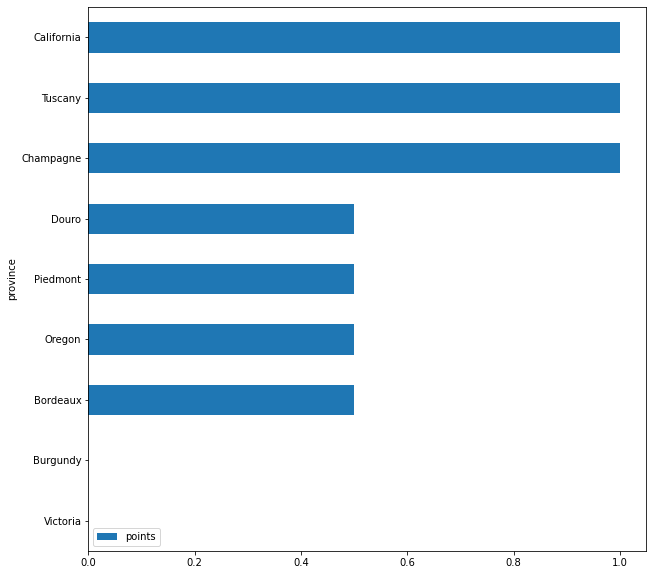

In [166]:
df = wine.nlargest(20, ['points'])[['province', 'points']].drop_duplicates('province').set_index('province')
df = df.transform(lambda df: (df - df.min()) / (df.max() - df.min())).sort_values(by='points', ascending=True)
df.plot(kind='barh', figsize=(10,10))


## Словарь соответствий `province` - `variety`

In [167]:
color = {
    "Chardonnay": "white",
    "Pinot Noir": "red",
    "Cabernet Sauvignon": "red",
    "Red Blend": "red",
    "Bordeaux-style Red Blend": "red",
    "Sauvignon Blanc": "white",
    "Syrah": "red",
    "Riesling": "white",
    "Merlot": "red",
    "Zinfandel": "red",
    "Sangiovese": "red",
    "Malbec": "red",
    "White Blend": "white",
    "Rosé": "other",
    "Tempranillo": "red",
    "Nebbiolo": "red",
    "Portuguese Red": "red",
    "Sparkling Blend": "other",
    "Shiraz": "red",
    "Corvina, Rondinella, Molinara": "red",
    "Rhône-style Red Blend": "red",
    "Barbera": "red",
    "Pinot Gris": "white",
    "Viognier": "white",
    "Bordeaux-style White Blend": "white",
    "Champagne Blend": "other",
    "Port": "red",
    "Grüner Veltliner": "white",
    "Gewürztraminer": "white",
    "Portuguese White": "white",
    "Petite Sirah": "red",
    "Carmenère": "red"
}

## Отфильтрованные записи, для которых нет соответствия в `color`

In [179]:
wine = wine[wine['variety'].isin(color.keys())]

## Распределения числовых переменных

<AxesSubplot:ylabel='Density'>

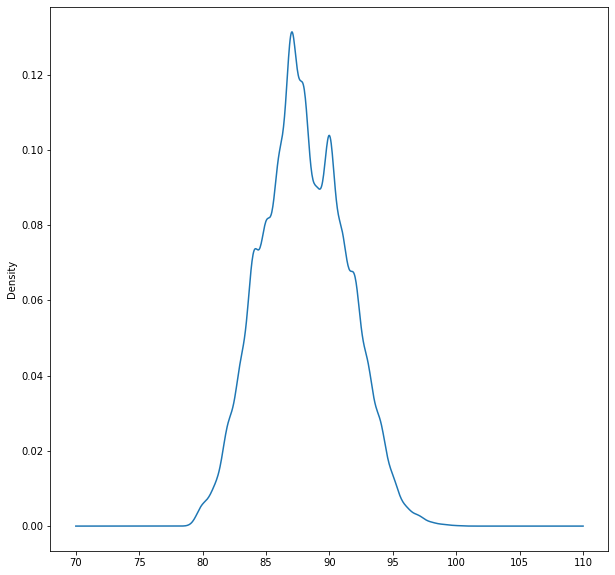

In [194]:
wine['points'].plot.kde(figsize=(10,10))

<AxesSubplot:ylabel='Frequency'>

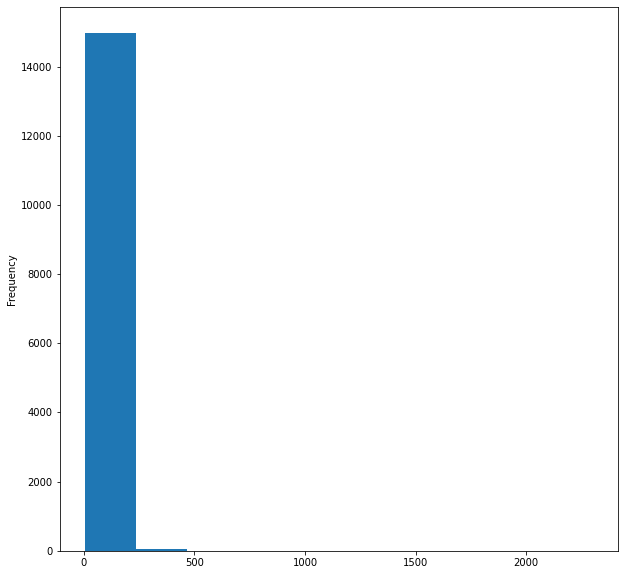

In [385]:
wine['price'].plot.hist(figsize=(10,10))

In [191]:
wine.describe()

points         price
count  16499.000000  15041.000000
mean      87.994303     34.487202
std        3.298385     41.674428
min       80.000000      5.000000
25%       86.000000     16.000000
50%       88.000000     25.000000
75%       90.000000     40.000000
max      100.000000   2300.000000

## Доля вин в каждой стране

<ipython-input-332-83640e2dd7b6>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


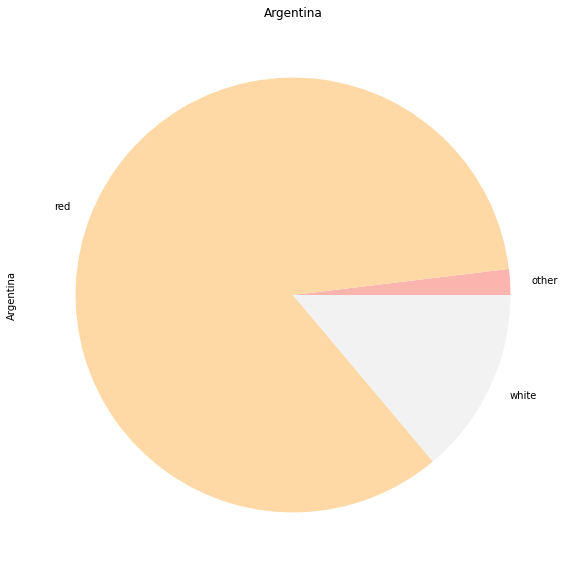

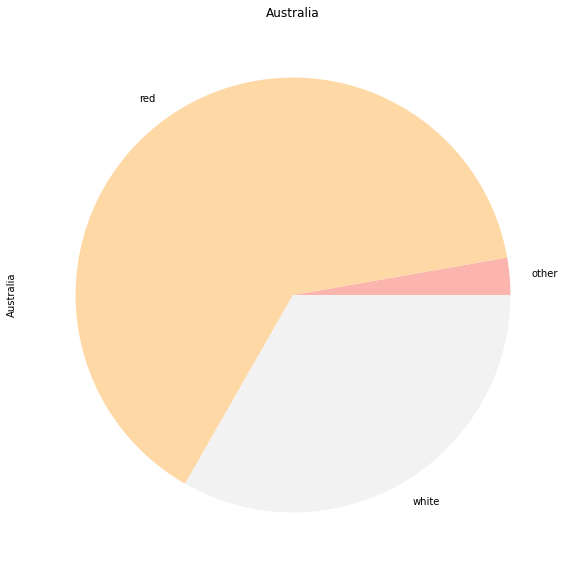

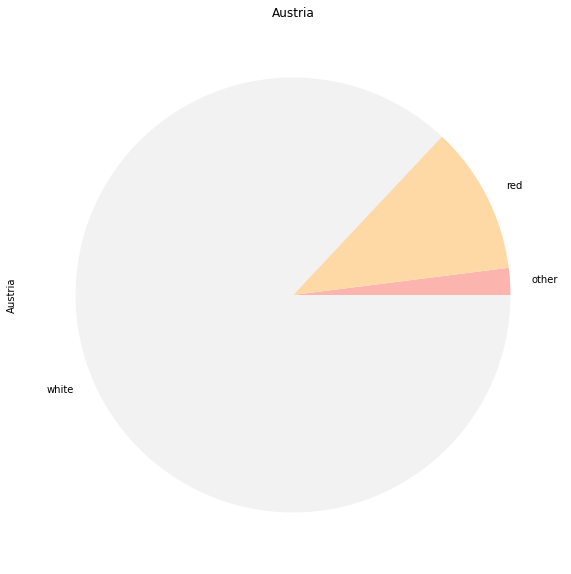

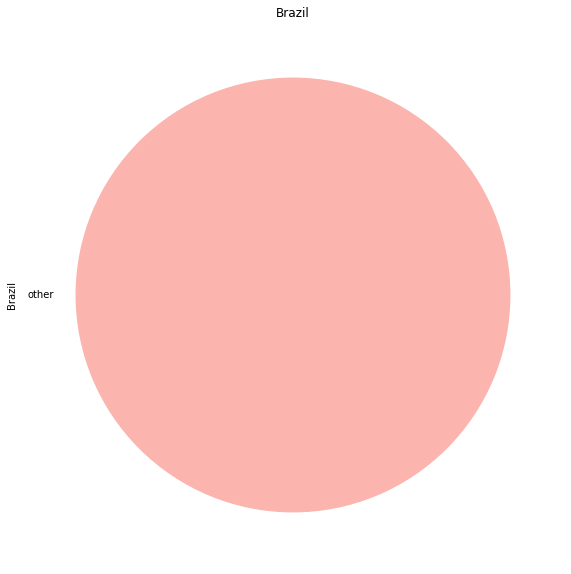

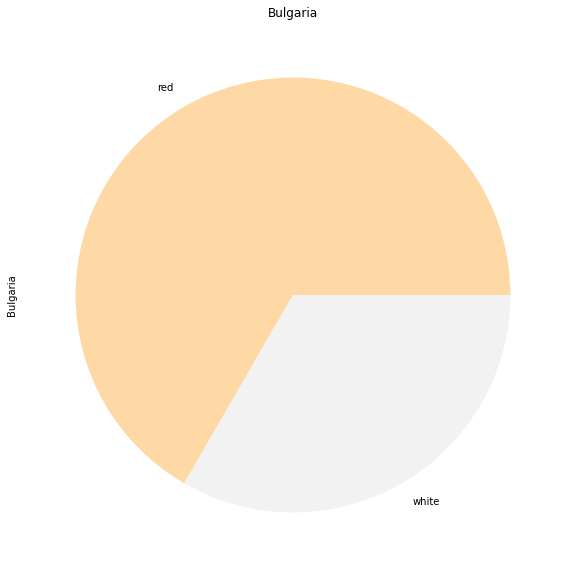

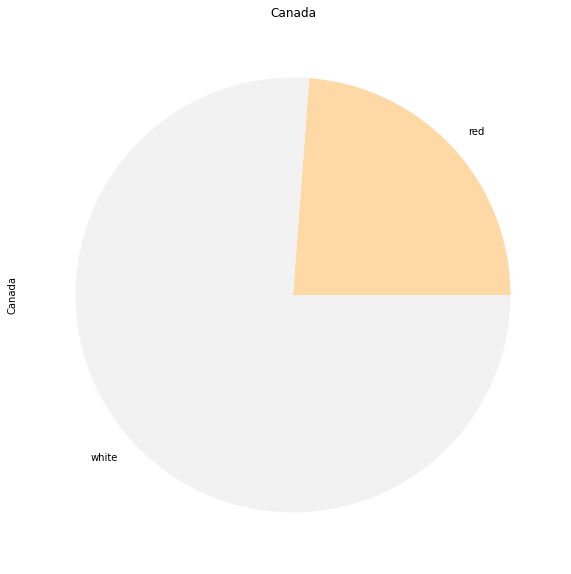

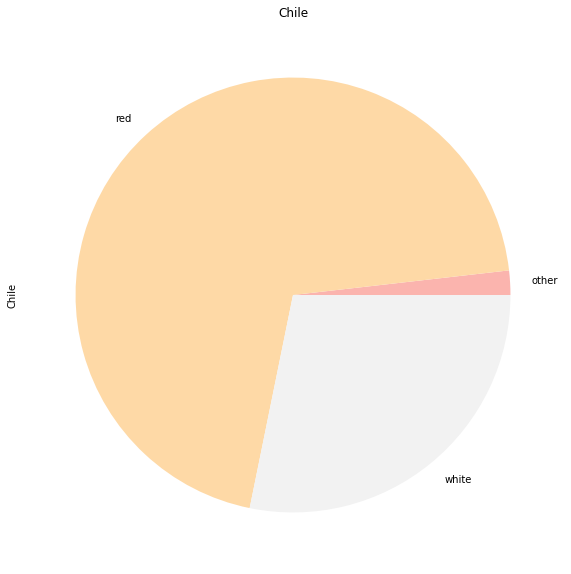

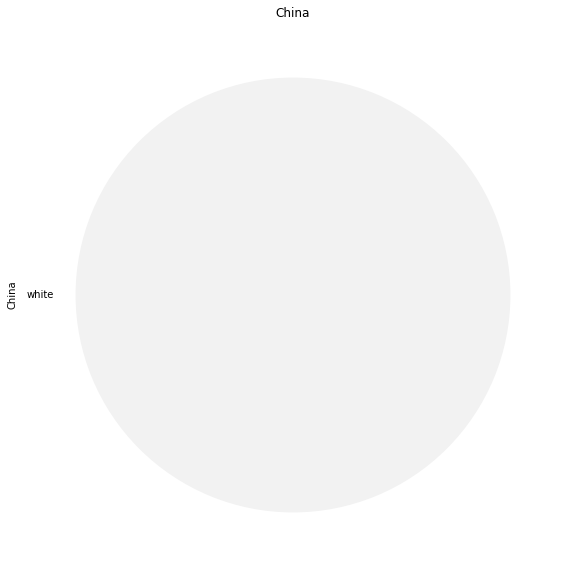

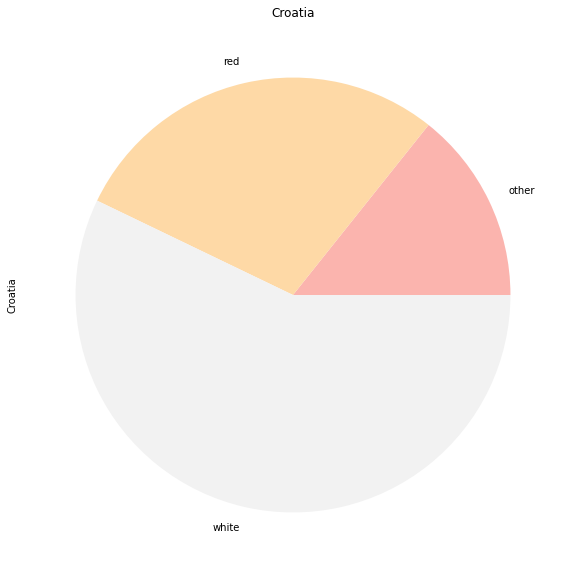

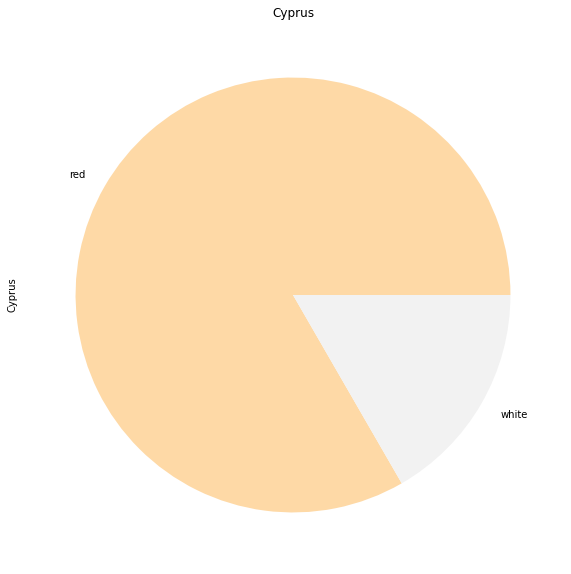

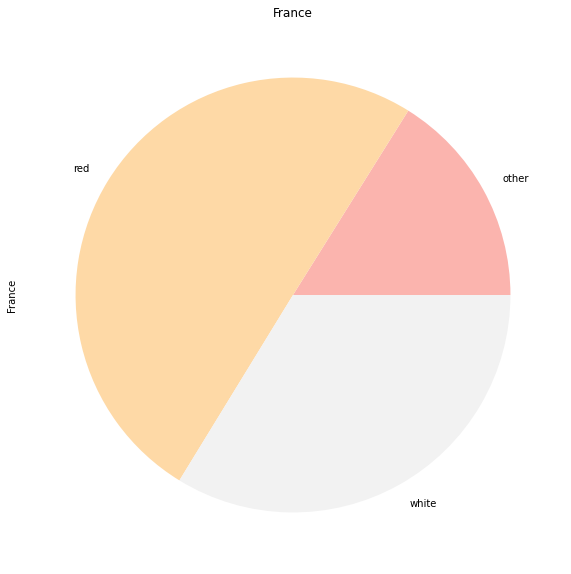

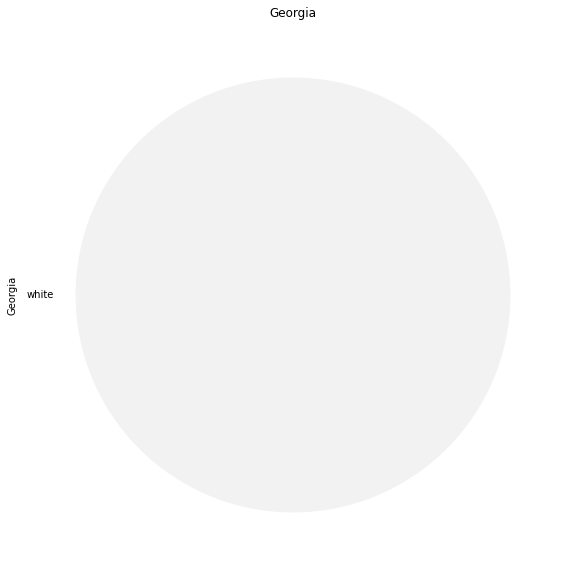

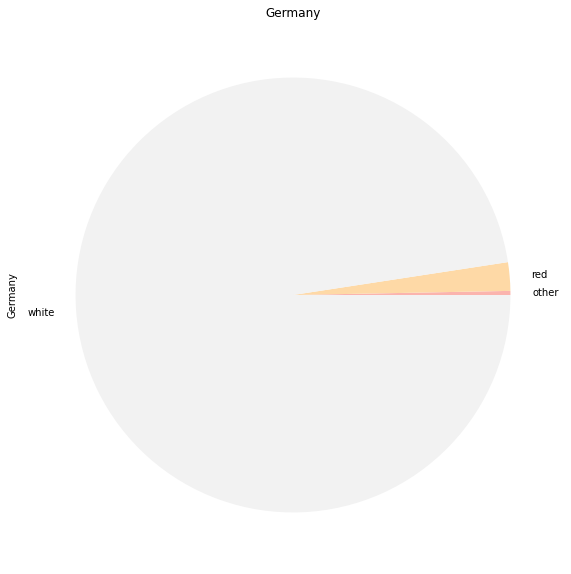

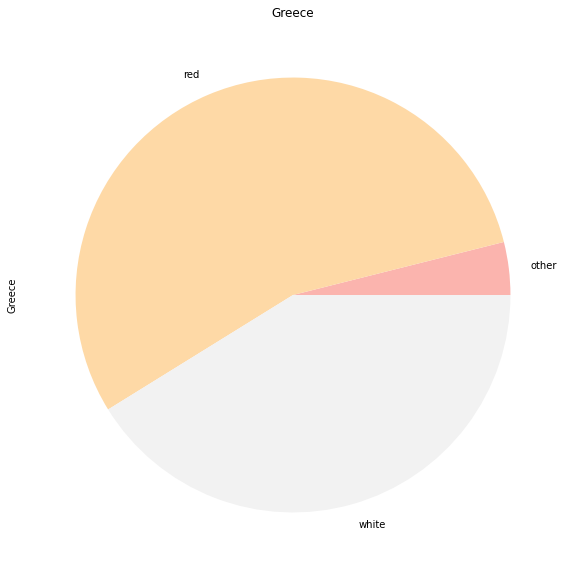

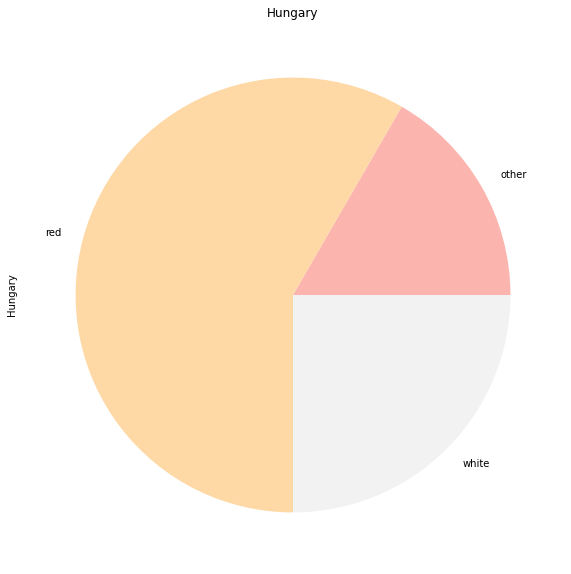

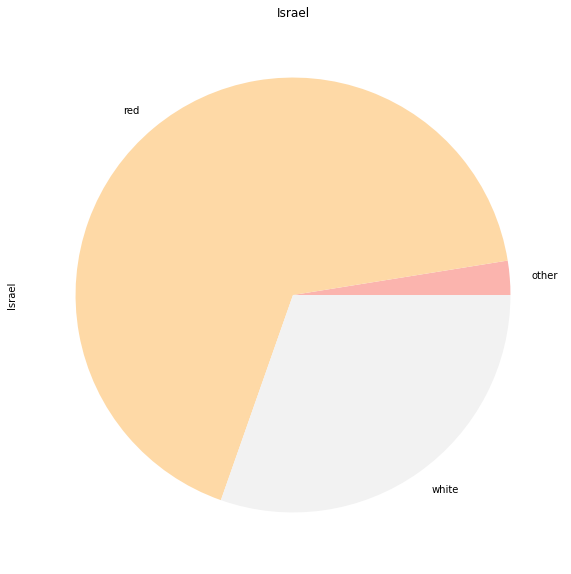

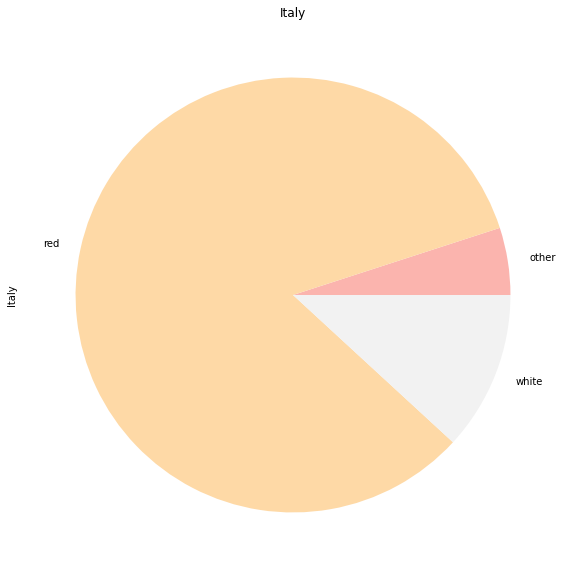

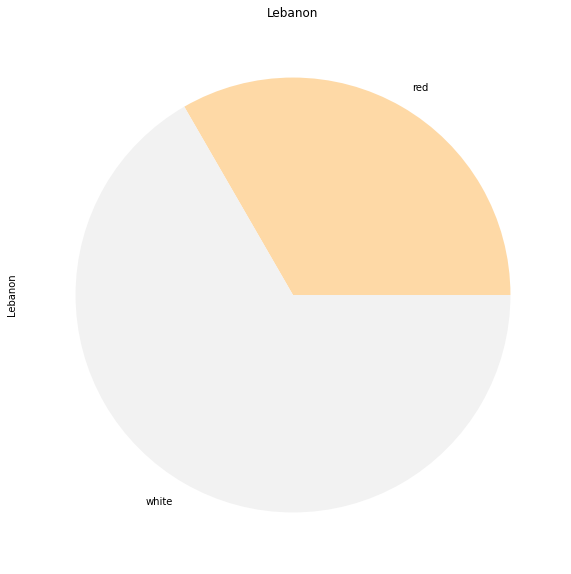

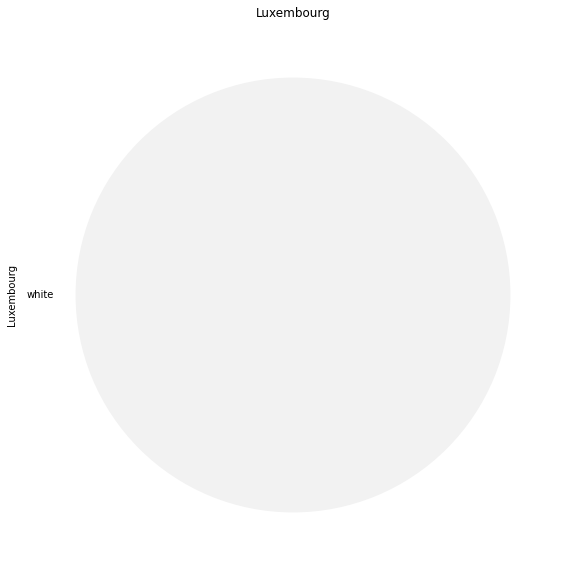

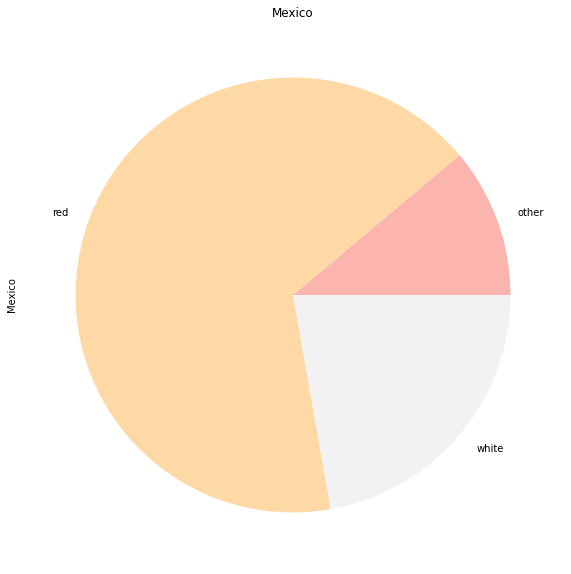

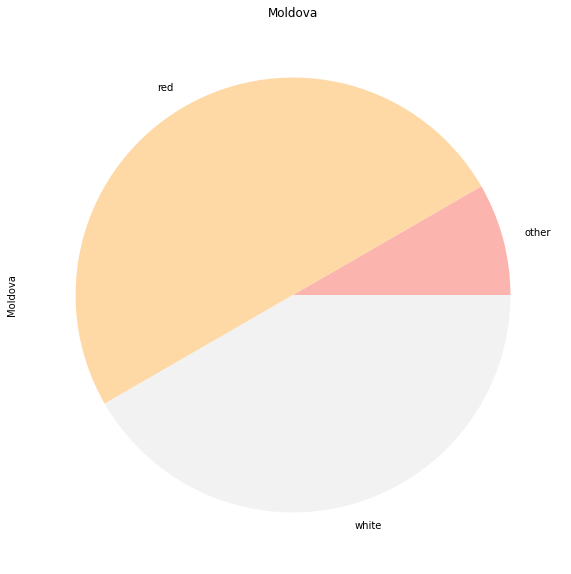

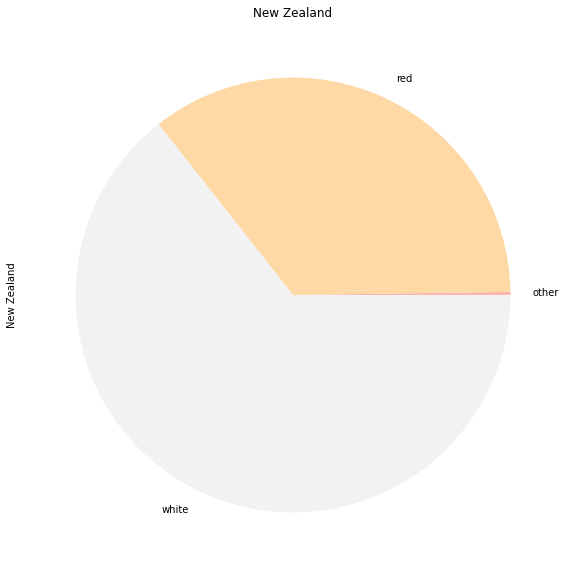

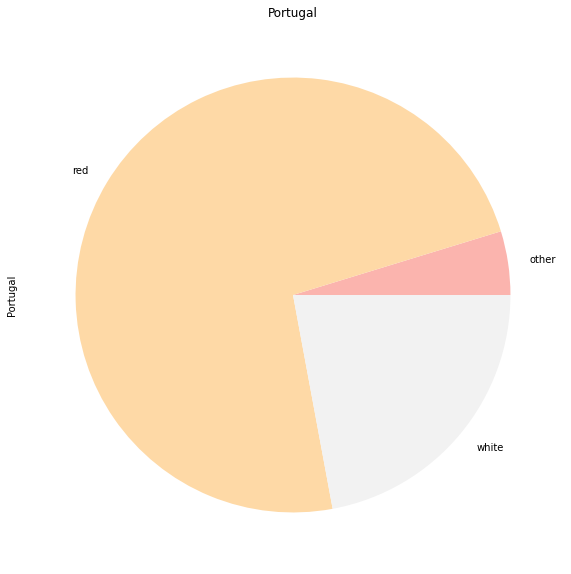

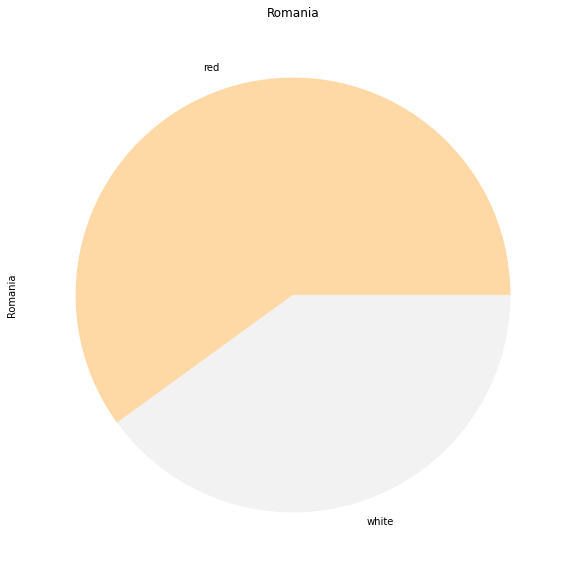

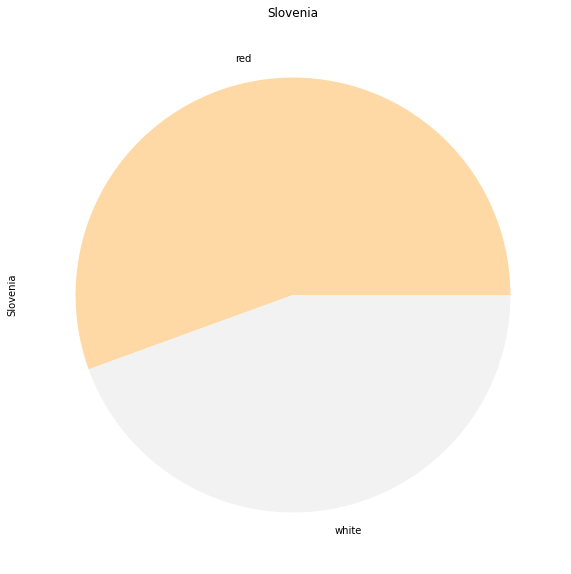

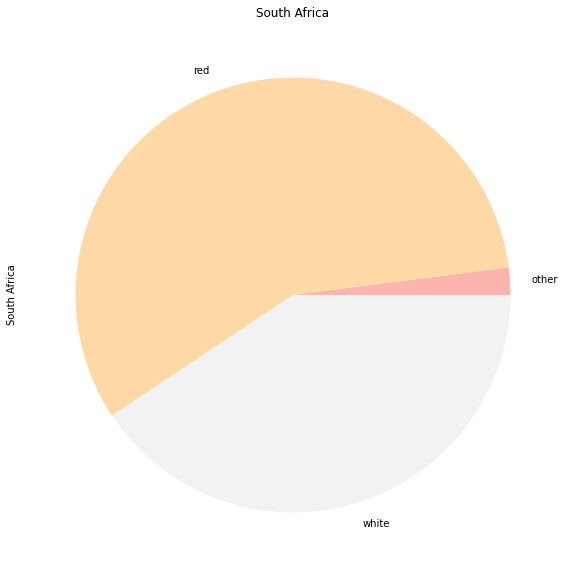

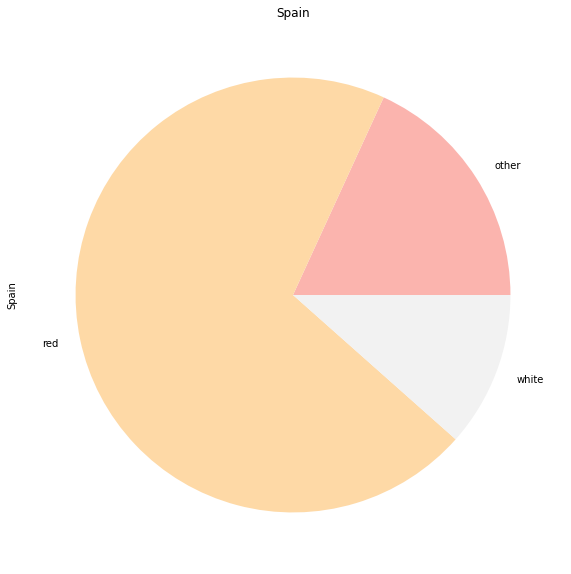

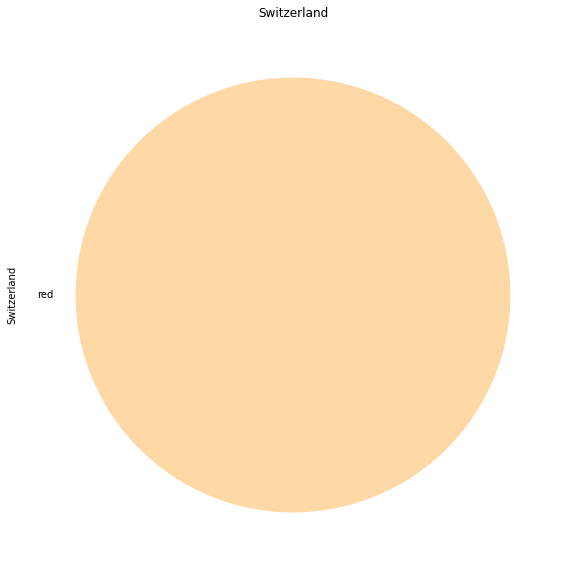

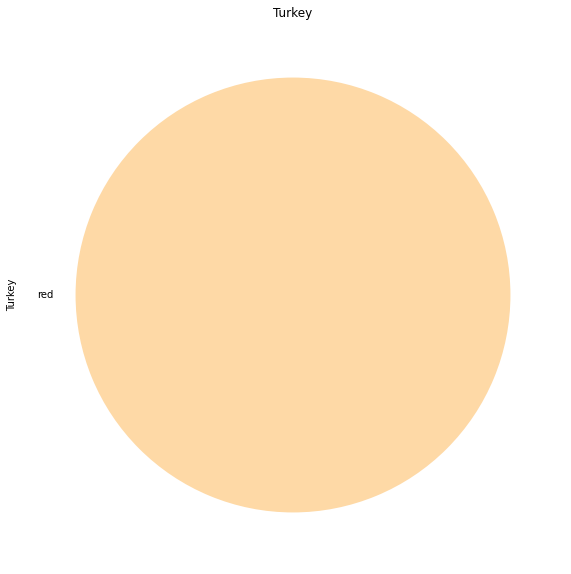

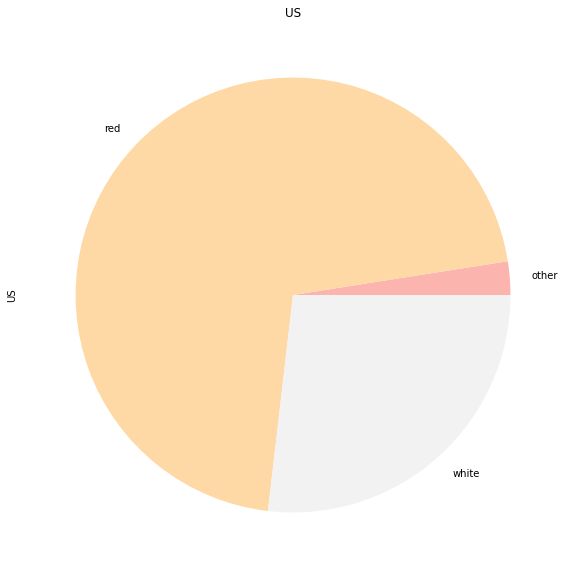

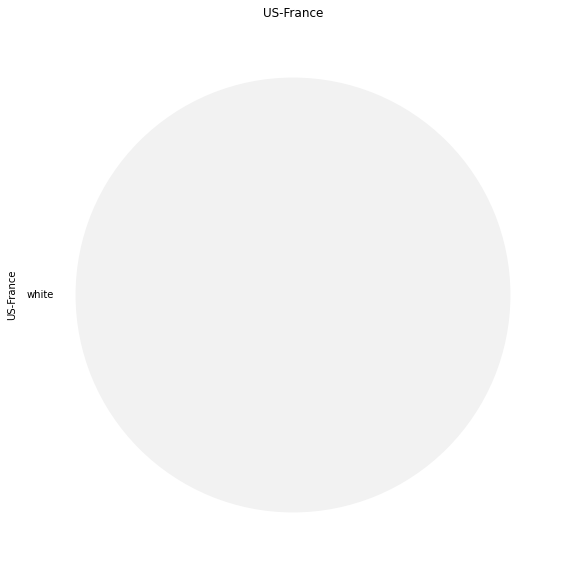

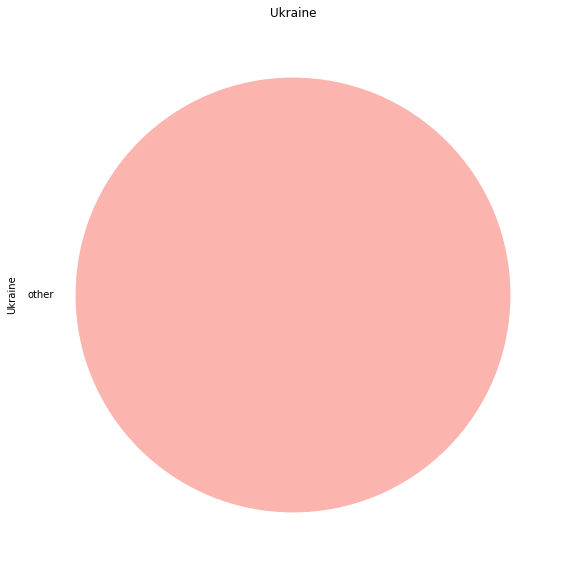

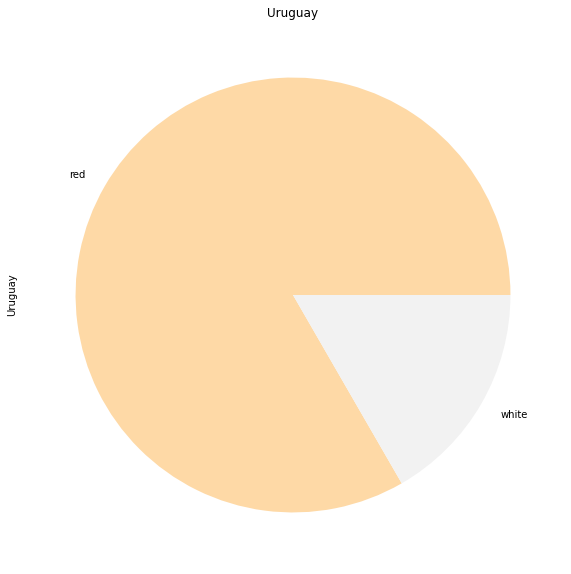

In [332]:
df = wine.replace({'variety' : color}).groupby(['country', 'variety']).size().unstack(fill_value=0)
for i in df.index:
    fig, ax = plt.subplots()
    ax.set_title(i)
    df.loc[i].plot(kind='pie', figsize=(10,10), colormap='Pastel1');

In [368]:
red = (df['red'] / (df['red'] + df['white'])).sort_values(ascending=False).nlargest(2)
white = (df['white'] / (df['red'] + df['white'])).sort_values(ascending=False).nlargest(4)
print(white)

country
Turkey         1.0
Switzerland    1.0
dtype: float64
country
US-France     1.0
Georgia       1.0
Luxembourg    1.0
China         1.0
dtype: float64


## Страны с полным преобладанием белого вина

In [372]:
print(red.index.values)

['Turkey' 'Switzerland']


## Страны с полным преобладанием красного вина

In [374]:
print(white.index.values)

['US-France' 'Georgia' 'Luxembourg' 'China']


# Регрессионная модель
- Разделите выборку на обучающую и тестовую
- На обучающей выборке постройте регрессионную модель, показывающую зависимость между баллом (зависимая переменная) и ценой. Визуализируйте эту зависимость. На сколько изменяется оценка при изменении цены на одну условную единицу?
- Оцените качество модели на основе предсказаний по тестовой выборке по помощи стандартных метрик качества для регрессионных моделей.
- Добавьте в модель переменную, в которой закодирован цвет вина. Как изменилось качество?


In [589]:
wine['price'] = wine['price'].apply(lambda x: int(x) if not isnan(x) else 0)

In [610]:
y = wine['points']
X = wine['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<AxesSubplot:ylabel='Density'>

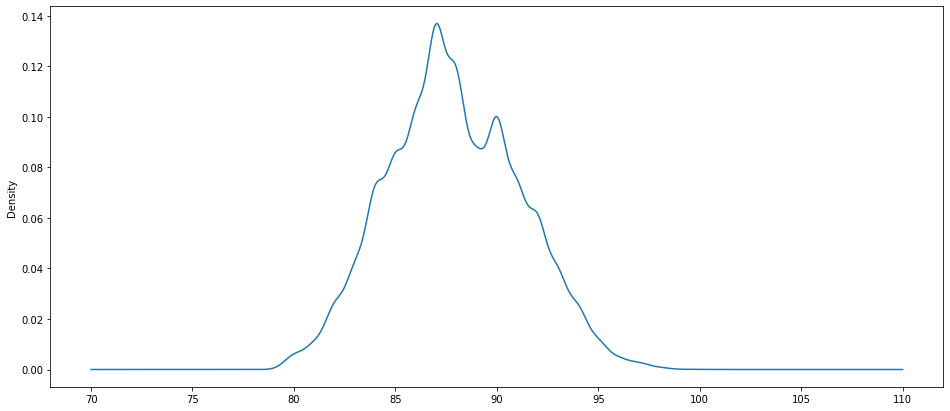

In [594]:
y_train.plot.kde()

In [596]:
# X_train = X_train.apply(lambda x: int(x) if not isnan(x) else 0)
# X_test = X_test.apply(lambda x: int(x) if not isnan(x) else 0)
lm = LinearRegression()
lm.fit(X_train.values.reshape(-1,1), y_train)

LinearRegression()

Text(0, 0.5, 'Points')

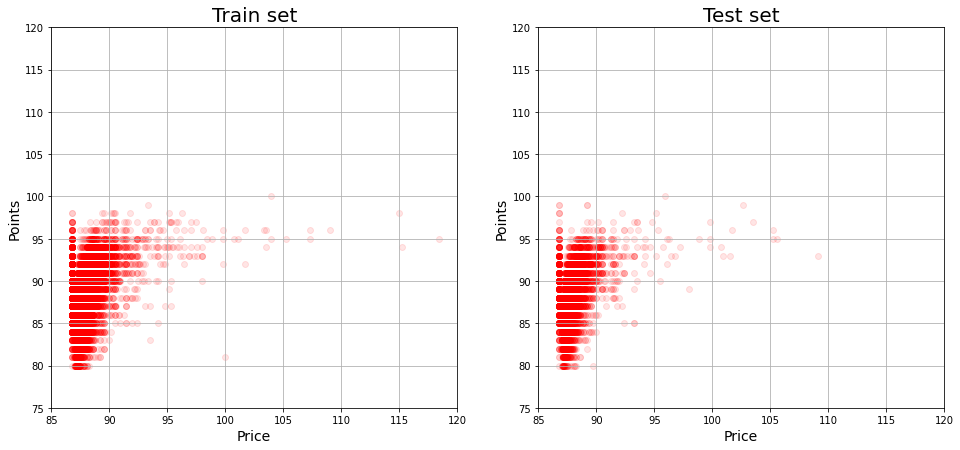

In [598]:
plt.figure(figsize(16,7))
plt.subplot(121)
pyplot.scatter(lm.predict(X_train.values.reshape(-1,1)), y_train, color="red", alpha=0.1)
pyplot.xlim(85,120)
pyplot.ylim(75,120)
grid()
pyplot.title('Train set', fontsize=20)
pyplot.xlabel('Price', fontsize=14)
pyplot.ylabel('Points', fontsize=14)

plt.subplot(122)
pyplot.scatter(lm.predict(X_test.values.reshape(-1,1)), y_test, color="red", alpha=0.1)
pyplot.xlim(85,120)
pyplot.ylim(75,120)
grid()
pyplot.title('Test set', fontsize=20)
pyplot.xlabel('Price', fontsize=14)
pyplot.ylabel('Points', fontsize=14)

### Как-то не очень предсказания получаются, всё из-за малого числа характеристик

In [599]:
sqrt(mean_squared_error(lm.predict(X_train.values.reshape(-1,1)), y_train))

2.9755792267160084

In [600]:
sqrt(mean_squared_error(lm.predict(X_test.values.reshape(-1,1)), y_test))

3.1331153747429035

## Коэффициент детерминации

In [619]:
lm.score(X_test.values.reshape(-1,1), y_test)

0.06455244956059625

In [601]:
y = wine['points']
X = wine.replace({'variety' : color})[['price', 'variety']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train['variety'] = X_train['variety'].apply(lambda x : -1 if x == 'red' else -1 if x == 'white' else 0);
X_test['variety'] = X_test['variety'].apply(lambda x : -1 if x == 'red' else -1 if x == 'white' else 0);

<ipython-input-601-26684b0477ab>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['variety'] = X_train['variety'].apply(lambda x : -1 if x == 'red' else -1 if x == 'white' else 0);
<ipython-input-601-26684b0477ab>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['variety'] = X_test['variety'].apply(lambda x : -1 if x == 'red' else -1 if x == 'white' else 0);


In [587]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

Text(0, 0.5, 'Points')

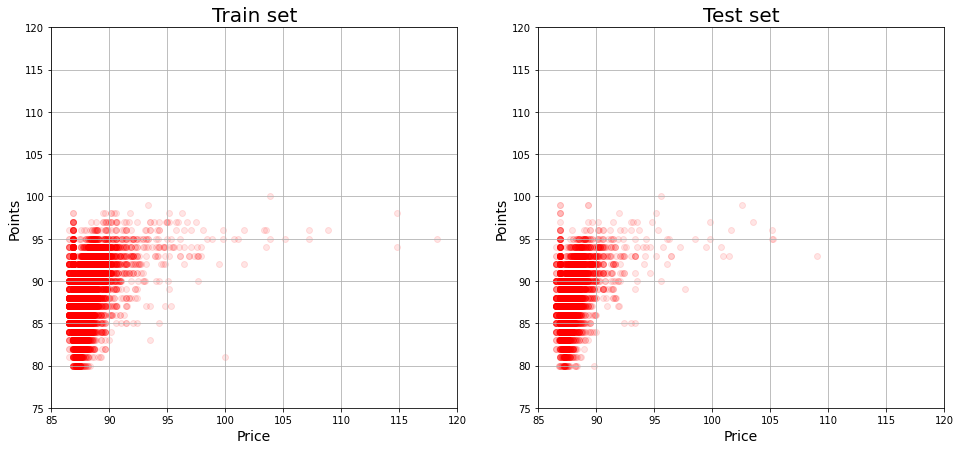

In [588]:
plt.figure(figsize(16,7))
plt.subplot(121)
pyplot.scatter(lm.predict(X_train), y_train, color="red", alpha=0.1)
pyplot.xlim(85,120)
pyplot.ylim(75,120)
grid()
pyplot.title('Train set', fontsize=20)
pyplot.xlabel('Price', fontsize=14)
pyplot.ylabel('Points', fontsize=14)

plt.subplot(122)
pyplot.scatter(lm.predict(X_test), y_test, color="red", alpha=0.1)
pyplot.xlim(85,120)
pyplot.ylim(75,120)
grid()
pyplot.title('Test set', fontsize=20)
pyplot.xlabel('Price', fontsize=14)
pyplot.ylabel('Points', fontsize=14)

### С добавлением дополнительной характеристики ошибка уменьшилась буквально на тысячные доли.
### Очевидно, что с большим числом характеристик для предсказаний можно было бы достичь более лучших показателей

In [580]:
sqrt(mean_squared_error(lm.predict(X_train), y_train))

2.9726769775017656

In [582]:
sqrt(mean_squared_error(lm.predict(X_test), y_test))

3.1248944387131026